In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import scipy
import csv 


import openpyxl
from pathlib import Path

xlsx_file = Path('train_2.xlsx')
wb_obj = openpyxl.load_workbook(xlsx_file)
sheet = wb_obj.active



In [21]:
X_train= np.zeros((sheet.max_row-1,sheet.max_column-1),float)
Y_train=np.zeros((1,sheet.max_row-1),float)


col_names = []

c=0
d=0


for i in range(2,sheet.max_row+1):
    
    d=0
    for j in range(1,sheet.max_column):
        X_train[c,d]=sheet.cell(row=i,column=j).value
        d=d+1
      
    if(sheet.cell(row=i,column=j+1).value=='Iris-virginica'):
        Y_train[0,c]=0
    else:
        Y_train[0,c]=1
        
        
    c=c+1
    




In [22]:

filename = "test_2.csv"
fields = [] 
rows = [] 
c=0
d=0  
with open(filename, 'r') as csvfile: 
    csvreader = csv.reader(csvfile) 
      

    fields = next(csvreader) 
  
    for row in csvreader: 
        rows.append(row) 
  
    # get total number of rows 
    #print("Total no. of rows: %d"%(csvreader.line_num)) 
    
 
#print('Field names are:' + ', '.join(field for field in fields)) 
X_test= np.zeros((csvreader.line_num-1,4),float)  
Y_test=np.zeros((1,csvreader.line_num-1),float)

for row in rows[:csvreader.line_num]: 
    d=0
    # parsing each column of a row 
    for col in row:
        if(d<=3):
            X_test[c,d]=col
        d=d+1
        if(col=='Iris-virginica'):
            Y_test[0,c]=0
        else:
            Y_test[0,c]=1    
    c=c+1    

  

In [23]:

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1 / (1 + np.exp(-z))
    return s
    ### END CODE HERE ###
    

In [24]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    w = np.zeros(shape=(dim, 1))
    b = 0
    ### END CODE HERE ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [50]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation
    """
    
    m = X.shape[0]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)
    A = sigmoid(np.dot(w.T,X.T) + b)  # compute activation
 
    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))  # compute cost
    ### END CODE HERE ###
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    dw = (1 /m) * np.dot(X.T, (A - Y).T)
    db = (1 /m) * np.sum(A - Y)
    ### END CODE HERE ###

    #assert(dw.shape == w.shape)
    #assert(db.dtype == float)
    cost = np.squeeze(cost)
    #assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    return grads, cost
    

In [183]:

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
  
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        grads, cost = propagate(w, b, X, Y)
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
    
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w = w - learning_rate * dw  # need to broadcast
        b = b - learning_rate * db
        ### END CODE HERE ###
        
        # Record the costs
       
        if (i % 10000 == 0):
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 10000 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))

    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [184]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m=X.shape[0]
    Y_prediction = np.zeros((m,1))
    w = w.reshape(X.shape[1], 1)

    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A = sigmoid(np.dot(w.T,X.T) + b)
    ### END CODE HERE ###
    
    for i in range(A.shape[1]):
        # Convert probabilities a[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        Y_prediction[i,0] = 1 if A[0,i] > 0.5 else 0
        ### END CODE HERE ###
    
    assert(Y_prediction.shape == (m,1))
    
    return Y_prediction

In [185]:
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    
    # initialize parameters with zeros (≈ 1 line of code)
    dim=X_train.shape[0]
    b=0
    w=np.zeros([4,1])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    #print(Y_prediction_test)
    
  
    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train.T - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test.T - Y_test)) * 100)) 
    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [188]:
d = model(X_train,Y_train,X_test,Y_test, num_iterations =50000, learning_rate = 0.02, print_cost = True)



Cost after iteration 0: 0.693147
Cost after iteration 10000: 0.158625
Cost after iteration 20000: 0.136931
Cost after iteration 30000: 0.127470
Cost after iteration 40000: 0.121607
train accuracy: 94.36619718309859 %
test accuracy: 100.0 %


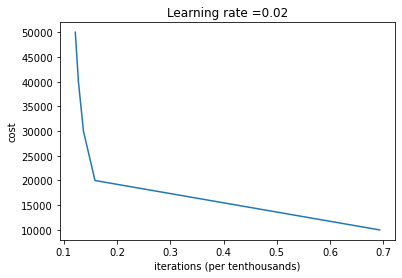

In [190]:
costs = np.squeeze(d['costs'])
plt.plot(costs,[10000,20000,30000,40000,50000])
plt.ylabel('cost')
plt.xlabel('iterations (per tenthousands)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()